# Assignment 3
May 10, 2022

Gurman Sachdeva

1007896314

$$\rule{500 px}{4 px}$$

## Question 1

First, we import the required libraries, and the module containing the iteration function:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iterator import iterator

Next, we create two parallel meshgrids (treating them as 2d arrays). The 'top' grid 
acts as the complex plane, with each point's real and imaginary parts lying on the 
two axes of the grid. The second grid is used to store whether each point on that
complex plane converges or diverges, and how long it takes to diverge.

In [6]:
real = np.linspace(-2, 2, 4000)
imaginary = np.linspace(-2, 2, 4000)

REAL, IMAGINARY = np.meshgrid(real, imaginary, indexing='xy')
DIVERGES, DIVERGENCE = np.meshgrid(real, imaginary, indexing='ij')

Now, the iteration function is called on every point in our complex plane. This updates corresponding values in the copy of the complex plane indicating the convergence/divergence of that point through iteration.

In [7]:
for i in range(REAL.shape[0]):
    for j in range(IMAGINARY.shape[0]):
        DIVERGES[i, j], DIVERGENCE[i, j] = iterator.iterate(REAL[i, j], IMAGINARY[i, j])

Now we create the first plot, only showing whether each point converges. A legend is used rather than a colour bar since there are only two colours, which was largely inspired by the following post:
https://stackoverflow.com/questions/10490302/how-do-you-create-a-legend-for-a-contour-plot-in-matplotlib

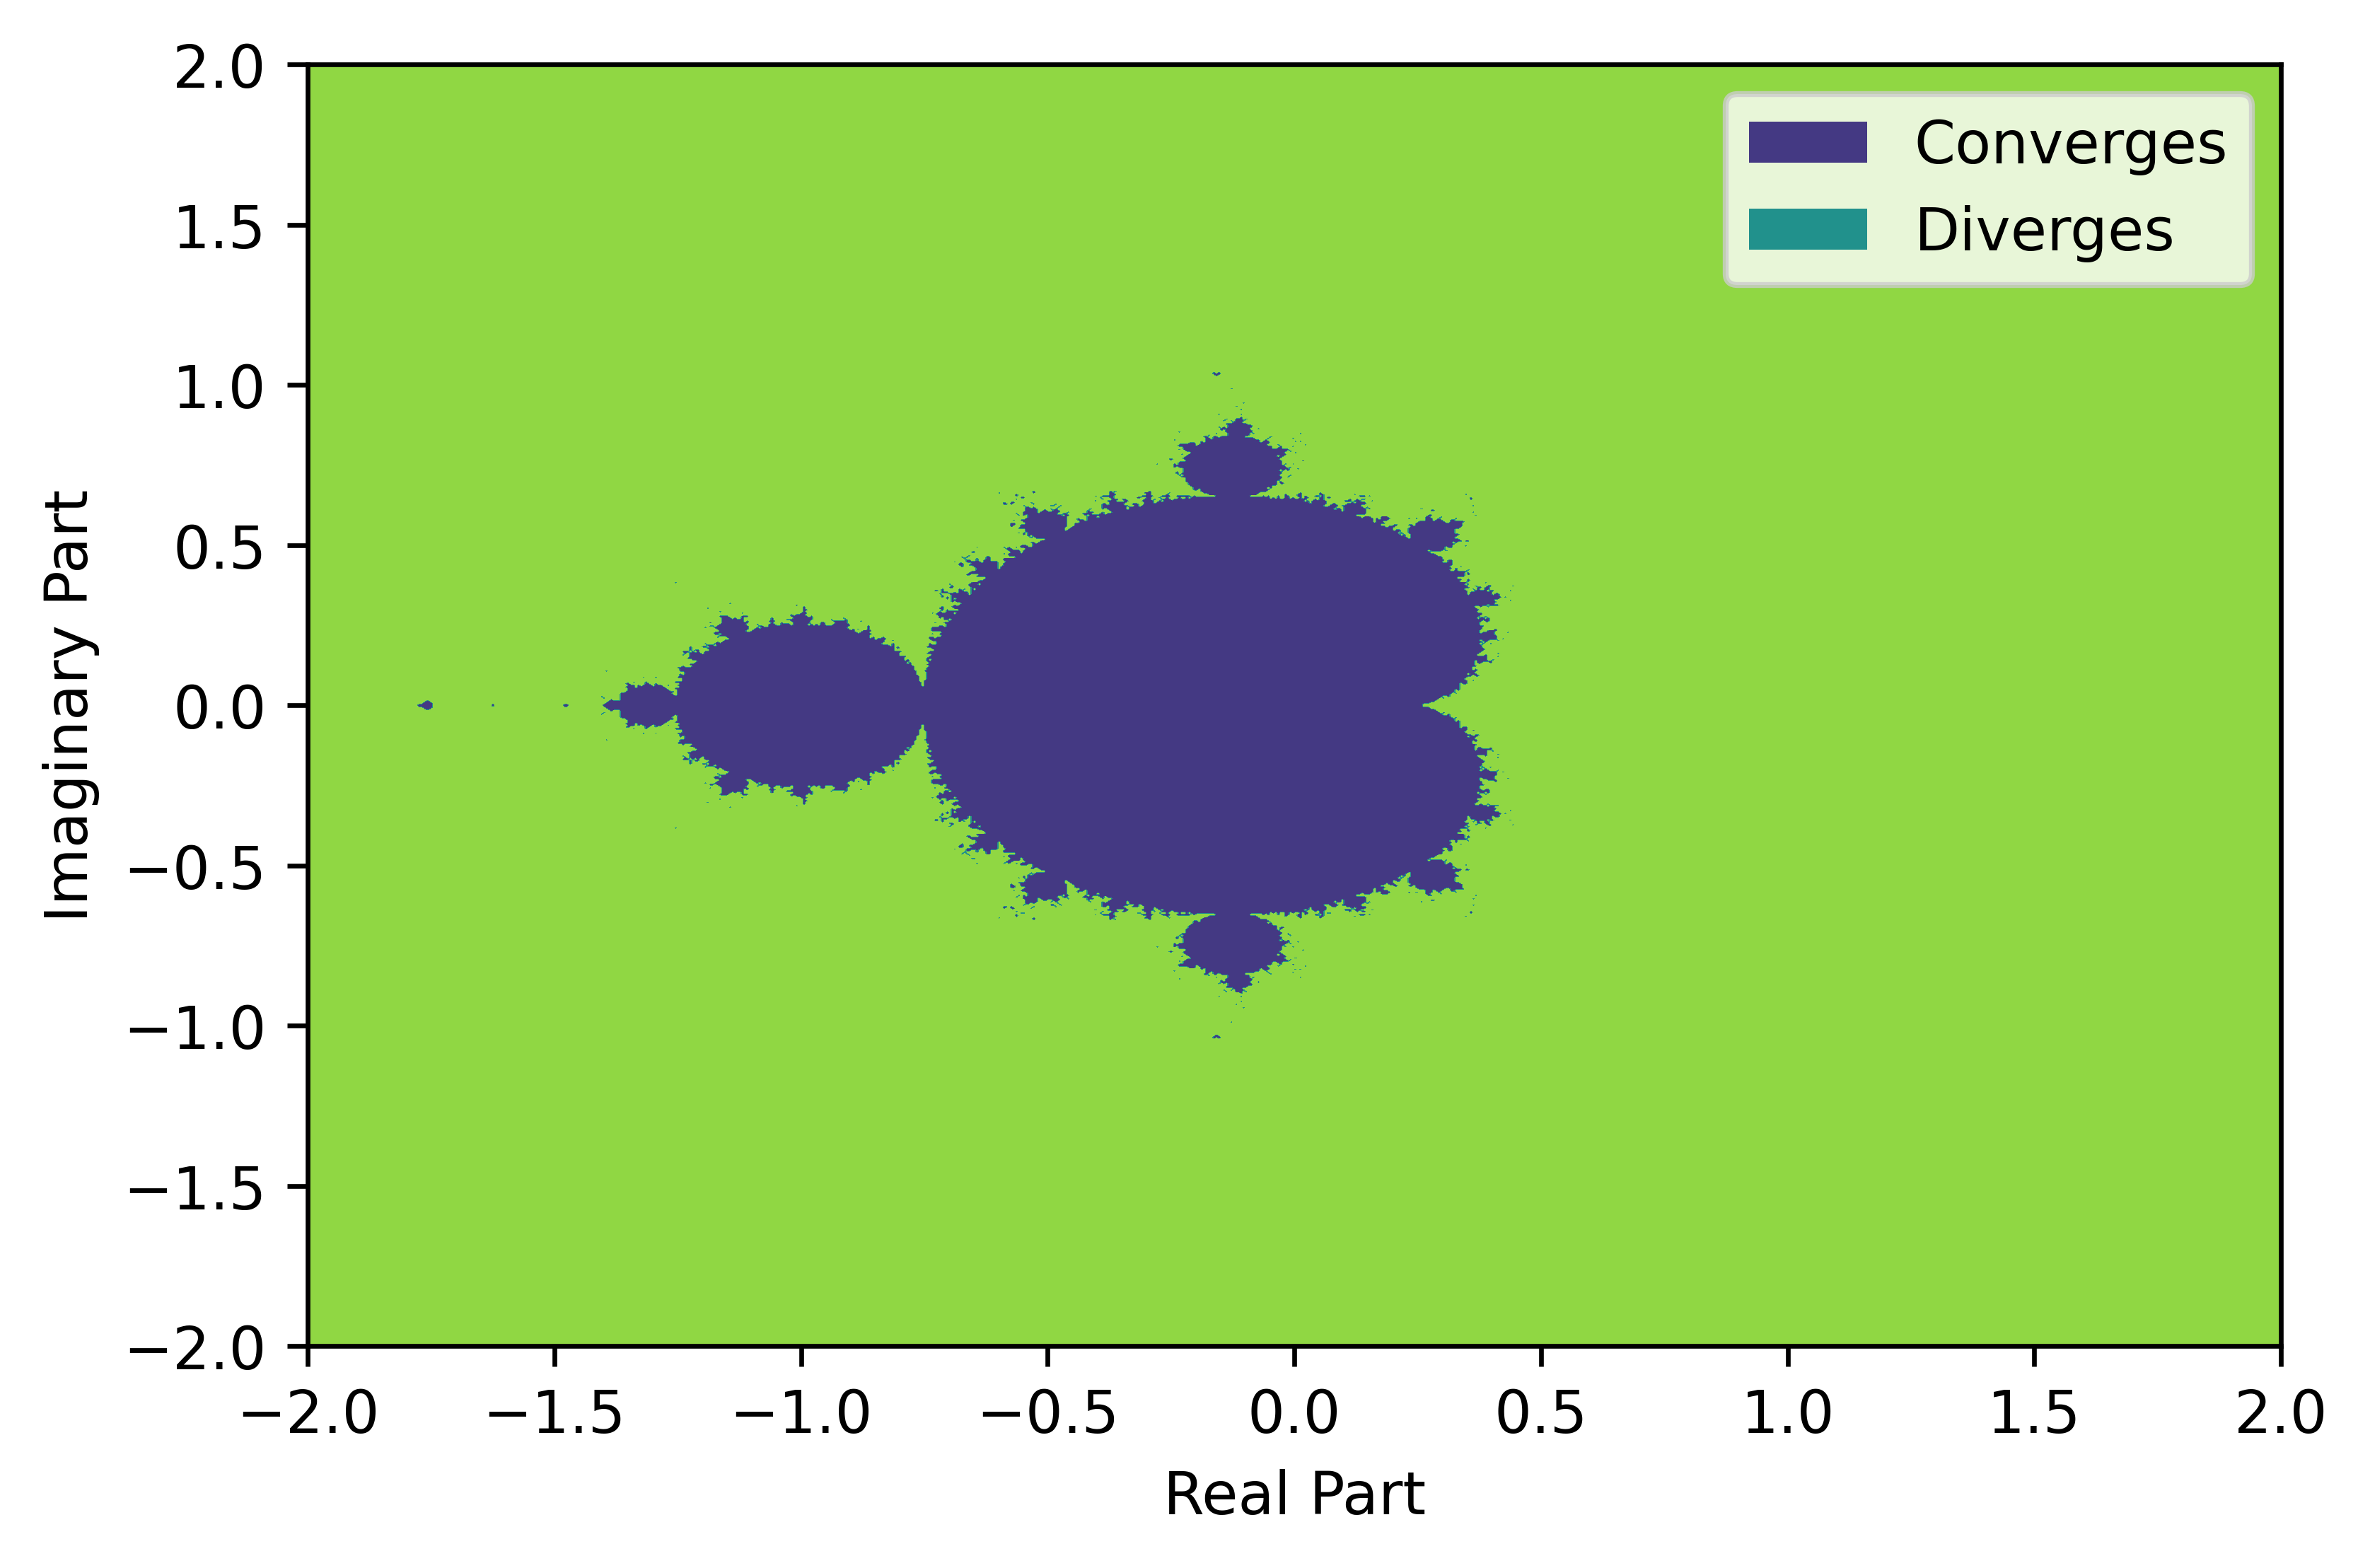

In [4]:
plt.figure(dpi=600)
temp = plt.contourf(real, imaginary, DIVERGES, levels=2)
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
         for pc in temp.collections]
plt.legend(proxy, ["Converges", "Diverges"])
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.show()

Now we create the second plot. Note that the darkest colour indicates '0 iterations were taken to diverge', which here actually means the point converges.

In [ ]:
plt.figure(dpi=600)
plt.contourf(real, imaginary, DIVERGENCE, levels=50)
plt.colorbar(label="# Iterations to divergence (0 indicates convergence)")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.savefig("Highres.png")
plt.show()

## Question 2